<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Mr. Maimoon Amin</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/Maimoon-github)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/maimoon7)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/maimoon-amin-6a2aa4275/)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](ideal.rhel@gmail.com)

# **TASK** # **3**

# **The overview of Car Price Prediction with Machine Learning**

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

DOWNLOAD DATASET FROM [here](https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars)

### Exploratory Data Analysis (EDA) for Car Price Prediction

In this EDA section, we’ll investigate the dataset to understand its structure, identify relationships between key features, and visualize correlations to see how they impact car prices. Here’s how to proceed:

#### 1. Checking the Dataset Structure and Types

- **Data Overview:** Load the dataset and display the first few rows using `head()` to understand its layout.
- **Data Types:** Use `info()` to get information on each feature’s data type and non-null counts. This will help us verify that each column’s data type aligns with its intended use (e.g., numerical or categorical).
- **Summary Statistics:** Use `describe()` to generate summary statistics (mean, median, min, max, etc.) for numerical features like `Year`, `Present_Price`, `Selling_Price`, and `Driven_kms`.

In [1]:
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")       


In [2]:
df = pd.read_csv('car data.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Get a summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Display summary statistics
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000



#### 2. Checking for Missing Values

Identify any missing values in the dataset. Missing data can affect model performance, so you may need to handle it by filling or removing missing entries.

If there are missing values:
- For numerical data, consider filling missing values with the mean or median.
- For categorical data, consider filling with the mode or use other imputation techniques.

But there isn't any null or missing values.

In [6]:
# Check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### 3. Identifying Relationships Between Features

Understanding relationships between features can provide insights into what affects car prices. Here are some key checks:

- **Year vs. Selling_Price:** Generally, the older the car, the lower the selling price. Analyze this by grouping data by `Year` and calculating the average `Selling_Price`.
- **Present_Price vs. Selling_Price:** Cars with a higher `Present_Price` (original price) often have a higher `Selling_Price`.
- **Driven_kms vs. Selling_Price:** Cars that have been driven more tend to have lower resale values.



In [7]:
# Group data by Year to analyze average Selling_Price
print(df.groupby('Year')['Selling_Price'].mean())

Year
2003    1.300000
2004    1.500000
2005    2.487500
2006    1.437500
2007    0.160000
2008    1.002857
2009    2.816667
2010    5.262667
2011    2.375263
2012    3.841304
2013    3.540909
2014    4.762105
2015    5.927049
2016    5.213200
2017    6.209143
2018    9.250000
Name: Selling_Price, dtype: float64


In [8]:

# Scatter plot to show relation between Present_Price and Selling_Price
import matplotlib.pyplot as plt
import seaborn as sns

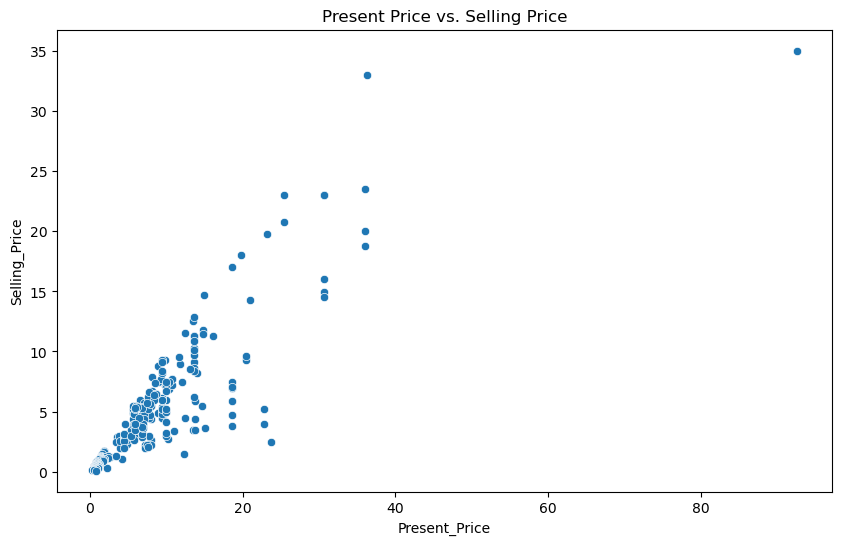

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title("Present Price vs. Selling Price")
plt.show()

#### 4. Data Visualization

Using visualization libraries like Seaborn and Matplotlib, we can better understand feature correlations.

- **Correlation Heatmap:** Use a heatmap to identify correlations between numerical features. This will help you see which features have the strongest relationships with `Selling_Price`.
- **Pairplot for Relationships:** A pairplot helps visualize relationships between multiple features in one go.

In [10]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

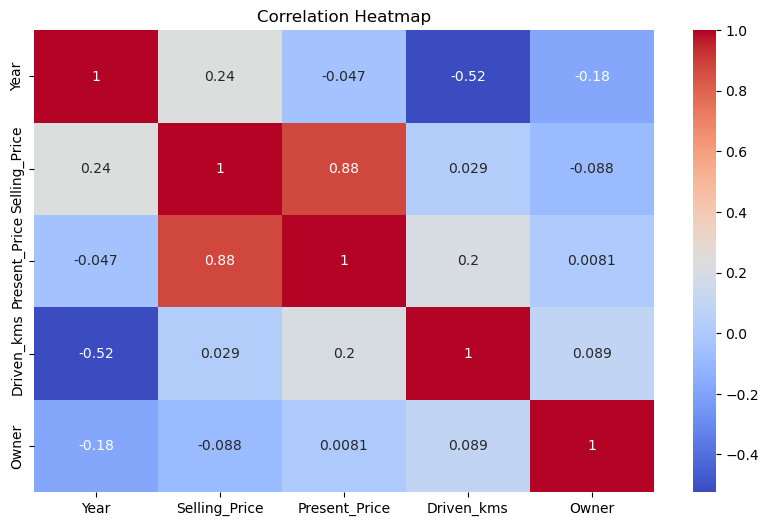

In [11]:
# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


This correlation heatmap shows the relationships between different numerical variables in a dataset related to cars. Here’s a summary of the observed correlations:

1. **Selling Price and Present Price**: A strong positive correlation (0.88) exists between `Selling_Price` and `Present_Price`, indicating that cars with a higher present price tend to have a higher selling price.

2. **Year and car_age**: There is a perfect negative correlation (-1.0) between `Year` and `car_age`, which makes sense as these are inversely related measures of time.

3. **Driven_kms and car_age**: A moderate positive correlation (0.52) is observed between `Driven_kms` and `car_age`, suggesting that older cars tend to have higher kilometers driven.

4. **Selling Price and car_age**: There’s a moderate negative correlation (-0.24) between `Selling_Price` and `car_age`, indicating that older cars generally have lower selling prices.

5. **Year and Driven_kms**: A moderate negative correlation (-0.52) between `Year` and `Driven_kms` suggests that newer cars tend to have fewer kilometers driven.

6. **Other Low Correlations**: Variables like `Owner` show very low correlation with other features, implying minimal or no linear relationship with most other variables in the dataset.

The color scale on the right ranges from -1.0 (dark blue, strong negative correlation) to 1.0 (dark red, strong positive correlation), with values closer to zero indicating weaker or no correlation. This heatmap helps in identifying relationships among variables, which can be useful for further analysis or modeling.

### Feature Selection and Engineering for Car Price Prediction

In this step, we’ll select the features that are most likely to influence car prices and prepare them for model training by converting categorical data into numerical values. Here’s how to go about it:

#### 1. Selecting Key Features

Based on initial analysis, the following features seem significant in determining the selling price of a car:
   - **Year:** Represents the manufacturing year, which can indicate car age.
   - **Present_Price:** The original or current market price of the car.
   - **Driven_kms:** The total distance the car has been driven, affecting its wear and tear.
   - **Fuel_Type:** Fuel type can influence value, as some types are preferred over others.
   - **Transmission:** Cars with automatic or manual transmissions may have different resale values.
   - **Owner:** Number of previous owners, as cars with more previous owners tend to depreciate faster.

To proceed, we’ll keep these selected features in our dataset and drop any unnecessary columns that may not contribute meaningfully to the model.

In [12]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
# Selecting key features and dropping unnecessary ones
selected_features = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Owner', 'Selling_Price', 'Selling_type']]

In [14]:
selected_features

,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Selling_Price,Selling_type
0,2014,5.59,27000,Petrol,Manual,0,3.35,Dealer
1,2013,9.54,43000,Diesel,Manual,0,4.75,Dealer
2,2017,9.85,6900,Petrol,Manual,0,7.25,Dealer
3,2011,4.15,5200,Petrol,Manual,0,2.85,Dealer
4,2014,6.87,42450,Diesel,Manual,0,4.60,Dealer
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Manual,0,9.50,Dealer
297,2015,5.90,60000,Petrol,Manual,0,4.00,Dealer
298,2009,11.00,87934,Petrol,Manual,0,3.35,Dealer
299,2017,12.50,9000,Diesel,Manual,0,11.50,Dealer


#### 2. Feature Engineering: Handling Categorical Data

Since machine learning algorithms typically work with numerical data, we need to convert the categorical features `Fuel_Type` and `Transmission` into numerical form. We can use two common methods for this:

   - **Label Encoding:** Converts categories into integers (e.g., `Fuel_Type`: Petrol = 1, Diesel = 2).
   - **One-Hot Encoding:** Creates a separate binary column for each category, setting a value of 1 for the present category and 0 otherwise (e.g., `Fuel_Type_Petrol`, `Fuel_Type_Diesel`).

For simplicity, we can use Label Encoding if there are only two categories in a feature; otherwise, One-Hot Encoding may be preferable. Here’s how we can apply these techniques:

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Label Encoding for object or categorical columns
le = LabelEncoder()
selected_features['Fuel_Type'] = le.fit_transform(selected_features['Fuel_Type'])
selected_features['Transmission'] = le.fit_transform(selected_features['Transmission'])
selected_features['Selling_type'] = le.fit_transform(selected_features['Selling_type'])

In [17]:
selected_features

,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Selling_Price,Selling_type
0,2014,5.59,27000,2,1,0,3.35,0
1,2013,9.54,43000,1,1,0,4.75,0
2,2017,9.85,6900,2,1,0,7.25,0
3,2011,4.15,5200,2,1,0,2.85,0
4,2014,6.87,42450,1,1,0,4.60,0
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,1,0,9.50,0
297,2015,5.90,60000,2,1,0,4.00,0
298,2009,11.00,87934,2,1,0,3.35,0
299,2017,12.50,9000,1,1,0,11.50,0



After this, the dataset will have these key columns:
   - `Year` (numeric)
   - `Present_Price` (numeric)
   - `Driven_kms` (numeric)
   - `Transmission` (numeric after Label Encoding)
   - `Owner` (numeric)
   - `Fuel_Type` (numeric after Label Encoding)

#### 3. Feature Scaling

In some cases, scaling numerical features can improve model performance, especially when using algorithms sensitive to feature magnitude (e.g., distance-based algorithms). Here we can scale features like `Present_Price`, `Driven_kms`, and `Year` if needed.


### Final Processed Dataset

After feature selection and engineering, our dataset is now ready with the following features:
   - **Year** (scaled)
   - **Present_Price** (scaled)
   - **Driven_kms** (scaled)
   - **Transmission** (encoded)
   - **Owner** (numeric)
   - **Fuel_Type** (encoded)

This prepared dataset can now be split into training and testing sets, enabling us to train our machine learning model for car price prediction.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Initialize the scaler
scaler = StandardScaler()

In [20]:
# Apply scaling to selected columns
selected_features[['Present_Price', 'Driven_kms']] = scaler.fit_transform(selected_features[['Present_Price', 'Driven_kms']])

In [21]:
selected_features

,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Selling_Price,Selling_type
0,2014,-0.236256,-0.256224,2,1,0,3.35,0
1,2013,0.221544,0.155911,1,1,0,4.75,0
2,2017,0.257472,-0.773969,2,1,0,7.25,0
3,2011,-0.403151,-0.817758,2,1,0,2.85,0
4,2014,-0.087906,0.141743,1,1,0,4.60,0
...,...,...,...,...,...,...,...,...
296,2016,0.460295,-0.076225,1,1,0,9.50,0
297,2015,-0.200328,0.593804,2,1,0,4.00,0
298,2009,0.390756,1.313340,2,1,0,3.35,0
299,2017,0.564604,-0.719876,1,1,0,11.50,0


### Final Processed Dataset

After feature selection and engineering, our dataset is now ready with the following features:
   - **Year** (scaled)
   - **Present_Price** (scaled)
   - **Driven_kms** (scaled)
   - **Transmission** (encoded)
   - **Owner** (numeric)
   - **Fuel_Type** (encoded)

This prepared dataset can now be split into training and testing sets, enabling us to train our machine learning model for car price prediction.

### Data Preprocessing, Model Training, and Evaluation for Car Price Prediction

In this section, we’ll prepare the data by standardizing features and splitting it into training and testing sets. Then, we’ll experiment with several regression algorithms, train the model, and evaluate its performance using common regression metrics.

#### 1. Data Preprocessing

**Standardization of Features:**
   - Standardizing features like `Present_Price` and `Driven_kms` can help the model learn more effectively, especially when the features have different scales.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Standardizing the features
scaler = StandardScaler()
selected_features[['Present_Price', 'Driven_kms']] = scaler.fit_transform(selected_features[['Present_Price', 'Driven_kms']])

**Splitting the Dataset:**
   - To evaluate our model’s performance, we need to split the dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Define feature matrix X and target variable y
X = selected_features.drop('Selling_Price', axis=1)
y = selected_features['Selling_Price']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2. Model Training

Now, we’ll try several regression algorithms to determine which one performs best for our car price prediction task. We’ll use:
   - **Linear Regression**: A simple algorithm suitable for linear relationships.
   - **Decision Tree**: A non-linear model that can capture complex patterns.
   - **Random Forest**: An ensemble model combining multiple decision trees for improved accuracy.
   - **Gradient Boosting**: A boosting model that can often yield high accuracy for regression tasks.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [28]:
# Initialize the models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

##### Train each model

In [29]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### 3. Model Evaluation

To evaluate model performance, we’ll use the following regression metrics:
   - **Mean Absolute Error (MAE)**: Measures the average absolute error between actual and predicted values.
   - **Mean Squared Error (MSE)**: Measures the average squared error, penalizing larger errors.
   - **Root Mean Squared Error (RMSE)**: The square root of MSE, useful for interpreting error in the same units as the target variable.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [34]:
# Evaluate each model on the test set
models = {'Linear Regression': linear_reg, 'Decision Tree': decision_tree, 
          'Random Forest': random_forest, 'Gradient Boosting': gradient_boosting}

The results of the model evaluation metrics tell us how well each model performed on the test dataset by measuring the errors in their predictions. Here’s what each metric represents and what we can infer from the results:

1. **Mean Absolute Error (MAE)**: This metric shows the average absolute difference between the actual values and the predicted values. A lower MAE indicates that the model's predictions are closer to the actual values on average. 

2. **Mean Squared Error (MSE)**: MSE is the average of the squared differences between actual and predicted values. Squaring the errors penalizes larger errors more heavily, making MSE sensitive to outliers. Lower MSE indicates better performance.

3. **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and brings the error back to the original scale of the data. Like MSE, a lower RMSE indicates better performance, with RMSE often being easier to interpret since it's on the same scale as the target variable.


In [35]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{model_name} Performance:")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - MSE: {mse:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print()


Linear Regression Performance:
  - MAE: 1.22
  - MSE: 3.53
  - RMSE: 1.88

Decision Tree Performance:
  - MAE: 0.73
  - MSE: 1.25
  - RMSE: 1.12

Random Forest Performance:
  - MAE: 0.62
  - MSE: 0.87
  - RMSE: 0.93

Gradient Boosting Performance:
  - MAE: 0.56
  - MSE: 0.82
  - RMSE: 0.90



### Interpretation of the Results:
- **Linear Regression**: 
  - MAE: 1.22, MSE: 3.53, RMSE: 1.88
  - Linear Regression has the highest error across all three metrics, which indicates that it is the least accurate model in this comparison.

- **Decision Tree**: 
  - MAE: 0.73, MSE: 1.25, RMSE: 1.12
  - Decision Tree performs significantly better than Linear Regression, with lower errors across all metrics. However, it’s still not the best model in this set.

- **Random Forest**: 
  - MAE: 0.62, MSE: 0.87, RMSE: 0.93
  - Random Forest further improves on the errors, showing that it generalizes better than the Decision Tree due to its ensemble nature, which combines multiple trees to make more accurate predictions.

- **Gradient Boosting**: 
  - MAE: 0.56, MSE: 0.82, RMSE: 0.90
  - Gradient Boosting has the lowest errors across all metrics, indicating that it is the most accurate model among the four. This is likely because Gradient Boosting minimizes errors iteratively and is particularly effective at handling complex patterns in the data.

### Summary:
Gradient Boosting outperforms all other models, with the lowest MAE, MSE, and RMSE values, indicating it is the best model for predicting `Selling_Price` in this dataset. Random Forest also performs well but with slightly higher error metrics than Gradient Boosting. Linear Regression, on the other hand, has the highest errors, which suggests it struggles to capture the complexity in the data as effectively as the other models.

#### 4. Hyperparameter Tuning

To further improve model accuracy, we can tune hyperparameters using techniques like Grid Search or Randomized Search.

Example with Grid Search for `RandomForestRegressor`:

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [38]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [39]:
# Display best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
# Re-evaluate model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("RMSE after tuning:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))

RMSE after tuning: 0.9331090571969336



After completing these steps, you’ll have a trained, evaluated, and tuned model for predicting car prices with an understanding of its performance across multiple metrics.

### Final Testing, Prediction, and Model Saving

In this final stage, we’ll test our trained model on the test set to evaluate its real-world performance and then save it for future use or deployment.

#### 1. Final Testing on the Test Set

Using the best-performing model from our previous steps, we’ll make predictions on the test set to assess how well it generalizes to unseen data. This will give us a better sense of the model’s real-world performance.

In [41]:
# Using the best model (e.g., the tuned Random Forest model) for final testing
y_test_pred = best_rf_model.predict(X_test)

In [42]:
# Calculate and print evaluation metrics
final_mae = mean_absolute_error(y_test, y_test_pred)
final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)

In [43]:
print("Final Model Performance on Test Set:")
print(f"  - Mean Absolute Error (MAE): {final_mae:.2f}")
print(f"  - Mean Squared Error (MSE): {final_mse:.2f}")
print(f"  - Root Mean Squared Error (RMSE): {final_rmse:.2f}")

Final Model Performance on Test Set:
  - Mean Absolute Error (MAE): 0.62
  - Mean Squared Error (MSE): 0.87
  - Root Mean Squared Error (RMSE): 0.93


#### 2. Making Predictions on New Data

To make predictions on new, unseen data, ensure that the new data follows the same preprocessing steps (such as scaling and encoding). Once the data is prepared, we can use our trained model to predict car prices.

In [44]:
selected_features.columns

Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission',
       'Owner', 'Selling_Price', 'Selling_type'],
      dtype='object')

In [45]:
selected_features

,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Selling_Price,Selling_type
0,2014,-0.236256,-0.256224,2,1,0,3.35,0
1,2013,0.221544,0.155911,1,1,0,4.75,0
2,2017,0.257472,-0.773969,2,1,0,7.25,0
3,2011,-0.403151,-0.817758,2,1,0,2.85,0
4,2014,-0.087906,0.141743,1,1,0,4.60,0
...,...,...,...,...,...,...,...,...
296,2016,0.460295,-0.076225,1,1,0,9.50,0
297,2015,-0.200328,0.593804,2,1,0,4.00,0
298,2009,0.390756,1.313340,2,1,0,3.35,0
299,2017,0.564604,-0.719876,1,1,0,11.50,0


In [46]:
selected_features.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [47]:
selected_features.Selling_type.unique()

array([0, 1])

In [48]:
# Assuming these are the features used during training
feature_names = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Owner', 'Selling_type']

In [49]:
# Create new data with the same feature names
new_data = pd.DataFrame({
    'Year': [2011],
    'Present_Price': [15.5],
    'Driven_kms': [30000],
    'Fuel_Type': [1],  # Assuming 1 = Diesel, 0 = Petrol [0]
    'Transmission': [1],  # Assuming 1 = Automatic
    'Owner': [0],
    'Selling_type': [0]
}, columns=feature_names)

In [50]:
# Standardizing the features
scaler = StandardScaler()
new_data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(new_data[['Present_Price', 'Driven_kms']])

In [51]:
new_data

,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Selling_type
0,2011,0.0,0.0,1,1,0,0


In [54]:
# Make predictions
predicted_price = best_rf_model.predict(new_data)
print("Predicted Car Price for New Data:", predicted_price[0])

Predicted Car Price for New Data: 3.3239999999999976


#### 3. Saving the Trained Model

To deploy the model in a production environment, save it using either `joblib` or `pickle`. This allows you to load the trained model later without retraining it, which is useful for deployment in applications.

In [55]:
import joblib

# Save the model to a file
joblib.dump(best_rf_model, 'car_price_prediction_model.joblib')

# Load the model for future predictions
loaded_model = joblib.load('car_price_prediction_model.joblib')


With the model saved, you can now integrate it into an application, load it for further predictions, or deploy it in a real-world environment, such as a web app or API, for car price predictions on-demand. This completes the end-to-end workflow for building, training, testing, and saving a car price prediction model.